[Python For Financial And Algorithmic Trading: ARIMA with Statsmodels](https://youtu.be/cm03ir2Lews)

In [96]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, timedelta

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
import datetime

x = datetime.datetime.now()
print("Now Time = ",x.strftime("%H:%M:%S %p"))
print(x.strftime("Date = %d"))
print(x.strftime("Weekday = %A"))
print(x.strftime("Month = %B"))
print(x.strftime("Year = %Y"))

Now Time =  11:19:11 AM
Date = 10
Weekday = Wednesday
Month = August
Year = 2022


In [99]:
df = pd.read_csv('training_100.csv')
df

,timestamp,kpi_value,request_count,anomaly_label
0,2020-08-14T02:00:00.000+02:00,0.998755,24908,0
1,2020-08-14T02:01:00.000+02:00,0.997683,25029,0
2,2020-08-14T02:02:00.000+02:00,0.998341,24115,0
3,2020-08-14T02:03:00.000+02:00,0.998211,24031,0
4,2020-08-14T02:04:00.000+02:00,0.998403,23790,0
...,...,...,...,...
20154,2020-08-28T01:56:00.000+02:00,0.998149,26467,0
20155,2020-08-28T01:57:00.000+02:00,0.998340,26502,0
20156,2020-08-28T01:58:00.000+02:00,0.998364,26887,0
20157,2020-08-28T01:59:00.000+02:00,0.998428,26712,0


In [100]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df

,timestamp,kpi_value,request_count,anomaly_label
0,2020-08-14 02:00:00+02:00,0.998755,24908,0
1,2020-08-14 02:01:00+02:00,0.997683,25029,0
2,2020-08-14 02:02:00+02:00,0.998341,24115,0
3,2020-08-14 02:03:00+02:00,0.998211,24031,0
4,2020-08-14 02:04:00+02:00,0.998403,23790,0
...,...,...,...,...
20154,2020-08-28 01:56:00+02:00,0.998149,26467,0
20155,2020-08-28 01:57:00+02:00,0.998340,26502,0
20156,2020-08-28 01:58:00+02:00,0.998364,26887,0
20157,2020-08-28 01:59:00+02:00,0.998428,26712,0


In [101]:
data = df[['timestamp', 'kpi_value']]

In [102]:
data.head()

,timestamp,kpi_value
0,2020-08-14 02:00:00+02:00,0.998755
1,2020-08-14 02:01:00+02:00,0.997683
2,2020-08-14 02:02:00+02:00,0.998341
3,2020-08-14 02:03:00+02:00,0.998211
4,2020-08-14 02:04:00+02:00,0.998403


In [103]:
data.tail()

,timestamp,kpi_value
20154,2020-08-28 01:56:00+02:00,0.998149
20155,2020-08-28 01:57:00+02:00,0.998340
20156,2020-08-28 01:58:00+02:00,0.998364
20157,2020-08-28 01:59:00+02:00,0.998428
20158,2020-08-28 02:00:00+02:00,0.997407


In [104]:
data.set_index('timestamp',inplace=True)

In [105]:
data.head()

,kpi_value
timestamp,
2020-08-14 02:00:00+02:00,0.998755
2020-08-14 02:01:00+02:00,0.997683
2020-08-14 02:02:00+02:00,0.998341
2020-08-14 02:03:00+02:00,0.998211
2020-08-14 02:04:00+02:00,0.998403


In [106]:
data.index

DatetimeIndex(['2020-08-14 02:00:00+02:00', '2020-08-14 02:01:00+02:00',
               '2020-08-14 02:02:00+02:00', '2020-08-14 02:03:00+02:00',
               '2020-08-14 02:04:00+02:00', '2020-08-14 02:05:00+02:00',
               '2020-08-14 02:06:00+02:00', '2020-08-14 02:07:00+02:00',
               '2020-08-14 02:08:00+02:00', '2020-08-14 02:09:00+02:00',
               ...
               '2020-08-28 01:51:00+02:00', '2020-08-28 01:52:00+02:00',
               '2020-08-28 01:53:00+02:00', '2020-08-28 01:54:00+02:00',
               '2020-08-28 01:55:00+02:00', '2020-08-28 01:56:00+02:00',
               '2020-08-28 01:57:00+02:00', '2020-08-28 01:58:00+02:00',
               '2020-08-28 01:59:00+02:00', '2020-08-28 02:00:00+02:00'],
              dtype='datetime64[ns, pytz.FixedOffset(120)]', name='timestamp', length=20159, freq=None)

In [107]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kpi_value,20159.0,0.992995,0.004018,0.951782,0.98995,0.992644,0.996622,0.999438


Visualize the data

<AxesSubplot:xlabel='timestamp'>

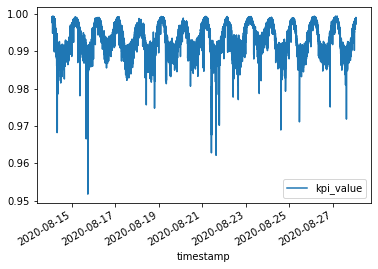

In [108]:
data.plot()

In [109]:
time_series = data['kpi_value']

In [110]:
type(time_series)

pandas.core.series.Series

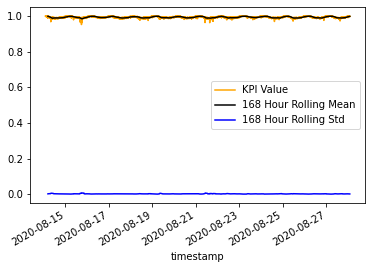

In [111]:
time_series.plot(label='KPI Value',color='orange')
time_series.rolling(7*24).mean().plot(label='168 Hour Rolling Mean',color='black') #168 Hour Rolling Mean
time_series.rolling(7*24).std().plot(label='168 Hour Rolling Std',color='blue') #168 Hour Rolling Std
plt.legend()

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
decomp = seasonal_decompose(time_series, freq=12)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [116]:
fig = decomp.plot()
fig.set_size_centimeters(15,8)

NameError: name 'decomp' is not defined